In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [132]:
import pandas as pd
import numpy as np
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt

## Data preparation

Feel free to try different combinations of filters, features etc.

In [133]:
%run traffic_util.py

In [134]:
%run features.py

In [5]:
#X_train, y_train, X_test, y_test = traffic_load("../../../data")

In [6]:
#X_train, X_test = traffic_resize(X_train, X_test, 2)

In [7]:
#X_train, X_test = traffic_2grey(X_train, X_test)

In [8]:
#X_train, X_test = traffic_separate_bg(X_train, X_test)

In [135]:
# Load corner representation of images
X_train = np.load("../../../inputs/corners_train.npy")
X_test = np.load("../../../inputs/corners_test.npy")
y_train = np.load("../../../inputs/y_train.npy")
y_test = np.load("../../../inputs/y_test.npy")

In [136]:

print X_train.shape, X_test.shape

(10438L,) (2625L, 100L, 1L, 2L)


In [137]:
print X_train.shape

(10438L,)


In [138]:
X_train = list2array(X_train)

In [34]:
#Bines here

In [139]:
%run features.py

In [168]:
print corners_bin(X_train[100], (12,16))
print np.sum(corners_bin(X_train[100], (12,16)))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1


In [201]:
a = c


In [203]:
b = sum(sum(Xte_b, 2), 1)

(array([ 10338.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    100.]),
 array([   1. ,   10.9,   20.8,   30.7,   40.6,   50.5,   60.4,   70.3,
          80.2,   90.1,  100. ]),
 <a list of 10 Patch objects>)

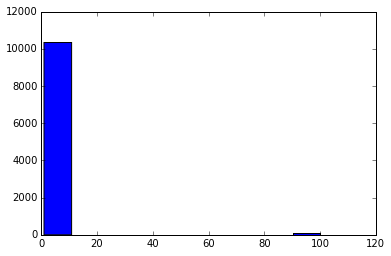

In [204]:
hist(a)

1


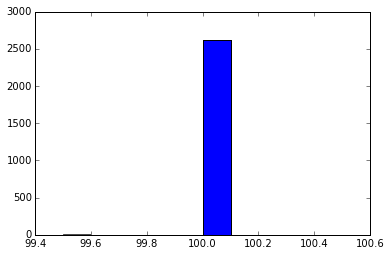

In [210]:
hist(b)
print min(a)

In [171]:
numOfCornersTe = sum(Xte_b, 0)
numOfCornersTr = sum(Xte_b, 0)


In [173]:
print max(numOfCornersTe)
print max(numOfCornersTr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [116]:
Xtr_b = map(lambda x : corners_bin(x, (12,16)), X_train)
Xte_b = map(lambda x : corners_bin(x, (12,16)), X_test)

In [123]:
print Xtr_b[5000]
print np.sum(Xtr_b[5000])

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1


In [39]:
print len(Xte_b), len(Xtr_b)

2625 10438


In [40]:
bg_corners = np.load("../../../inputs/bg_corners.npy")

In [41]:
bg_bins = corners_bin(bg_corners, (12,16))
print bg_bins

[[1 2 0 2 0 0 1 1 0 1 1 2 1 0 0 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 1 0 2 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 2]]


In [42]:
mask = (bg_bins == 0)

In [43]:
print bg_bins * mask

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [44]:
# Applay mask
Xtr_b = map(lambda x : x * mask, Xtr_b)
Xte_b = map(lambda x : x * mask, Xte_b)

In [45]:
# experiment



In [129]:
print Xte_b[0]
print np.sum(Xte_b[0])

[[2 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1]
 [2 2 1 2 1 1 1 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 2 0 0 0 0 0 1 1 4 1 0]
 [0 0 0 0 0 0 0 0 2 1 3 3 2 1 1 0]
 [2 1 1 0 0 0 0 1 1 3 1 2 0 0 0 1]
 [0 3 1 0 0 0 0 1 1 1 2 0 1 0 0 0]
 [1 0 0 0 0 0 1 2 1 2 1 2 1 0 0 0]
 [0 0 0 0 2 0 1 1 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 2 0 0 2 1]
 [0 0 0 0 0 0 0 1 1 1 2 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2]]
100


In [124]:
numOfCornersTe = sum(sum(Xte_b, 1), 1)
numOfCornersTr = sum(sum(Xte_b, 1), 1)


In [128]:
min(numOfCornersTr)

100

In [63]:
Xtr_b =  np.array(Xtr_b)
Xte_b =  np.array(Xte_b)

In [79]:
sum(Xtr_b[0])

58

In [104]:
Xtr_b[4004]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Models buillding

array([[0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1],
       [0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [69]:
print "Baselane accurency: %f" % (sum(y_test == 0) / float(len(y_test)))

Baselane accurency: 0.432381


Here we should experiment with different agorithms on current data set from "data preparation" part

In [28]:
# Lets try logisic regression OVA approach 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [29]:
print Xtr_b.shape, Xte_b.shape

(10438L, 12L, 16L) (2625L, 12L, 16L)


In [30]:
# Reshape images into rows
Xtr_b = np.reshape(Xtr_b, (Xtr_b.shape[0], -1))
Xte_b = np.reshape(Xte_b, (Xte_b.shape[0], -1))

In [31]:
print Xtr_b.shape, Xte_b.shape

(10438L, 192L) (2625L, 192L)


In [32]:
logR = OneVsRestClassifier(LinearSVC(random_state=11)).fit(Xtr_b, y_train)

In [33]:
y_test_hat = logR.predict(Xte_b)

In [34]:
print "Logistic regression accurency: %f" % (sum(y_test_hat == y_test) / float(len(y_test)))

Logistic regression accurency: 0.432381


In [35]:
# TODO: next, probably, we should select the classifier, that does the best, on features we have now;
# TODO: after that we can try extract some interesting features and try with this features (may be feed it to NN)
# TODO: or we can try CNN

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 400)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(Xtr_b, y_train)

# Take the same decision trees and run it on the test data
output = forest.predict(Xte_b)

print "RF accurency: %f" % (sum(output == y_test) / float(len(y_test)))

RF accurency: 0.432381


In [91]:
sum(y_test_hat == (y_test == 0)) / float(len(y_test))

0.56761904761904758

In [102]:
from sklearn import cluster

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(Xtr_b)

y_test_hat = kmeans.predict(Xte_b)

In [103]:
medium_hat = (y_test_hat == 0)
heavy_hat = (y_test_hat == 1)
light_hat = (y_test_hat == 2)

print sum(heavy_hat), sum(medium_hat), sum(light_hat)

print sum(y_test == 2), sum(y_test == 1), sum(y_test == 0) 

1861 0 764
720 770 1135


In [104]:
y_test_hat[light_hat] = 0
y_test_hat[medium_hat] = 1
y_test_hat[heavy_hat] = 2

In [105]:
print sum(y_test_hat == 2), sum(y_test_hat == 1), sum(y_test_hat == 0) 

print sum(y_test == 2), sum(y_test == 1), sum(y_test == 0) 

1861 0 764
720 770 1135


In [106]:
print "Clustering accurency: %f" % (sum(y_test_hat == y_test) / float(len(y_test)))

Clustering accurency: 0.565333


In [107]:
from sklearn.metrics import confusion_matrix

print confusion_matrix(y_test, y_test_hat)

[[764   0 371]
 [  0   0 770]
 [  0   0 720]]
